<a href="https://colab.research.google.com/github/MrGyani/Scientific-Computation/blob/main/Lab1_Part3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>Computer lab 1: Introduction to numpy and matplotlib</center>
## <center>Part 3: Vector and matrix operations</center>

<p>In this part of the lab you will work with matrix/vector-operations, such matrix multiplication, dot products, outer products and linear equation systems in <b>numpy</b>.</p>
<hr>
<p>First, as before begin with importing <b>numpy</b></p>

In [ ]:
import numpy as np

<h3>Matrix operations</h3>
<p>Create the matrices/vectors:
$$ \begin{array}{lllll}
A = \left( \begin{array}{ccc}
2 & 4 & -6 \\
1 & 5 & 3 \\
1 & 3 & 2
\end{array} \right), &
B = \left( \begin{array}{ccc}
1 & -1 & 1 \\
4 & 0 & -2 \\
0 & 1 & 1
\end{array} \right), &
C = \left( \begin{array}{cc}
1 & 2 \\
3 & 4 \\
5 & 6
\end{array}\right), &
x = \left( \begin{array}{ccc} 1 & 2 & 3 \end{array} \right), &
y = \left( \begin{array}{ccc} 2 & 1 & 0 \end{array} \right).
\end{array}
$$
Also, display the matrices and the vectors on the screen so you can see that they are correctly defined.

In [ ]:
# Enter your code here
A=np.array([[2,4,-6],[1,5,3],[1,3,2]])
B=np.array([[1,-1,1],[4,0,-2],[0,1,1]])
C=np.array([[1,2],[3,4],[5,6]])
x=np.array([1,2,3])
y=np.array([2,1,0])

<h4>Matrix and vector addition/subtraction</h4>
<p>Matrix addition and subtraction is straightforward, and follow standard linear algebra rules. Both addition and subtraction are are defined by elementwise addition/subtraction, i.e. $A+B$ takes every element of $A$ and add the corresponding element of $B$.</p>
<p>Try it out in Python, calculate <code>x+y</code>, <code>A+B</code>, <code>A-B</code> and <code>A+C</code> (note, it's correct that the last operation generates an error):</p>

In [ ]:
# Enter your code here
print('x+y= ', x+y)
print('A+B= ', A+B)
print('A-B= ', A-B)
print('A+C= ', A+C)

x+y=  [3 3 3]
A+B=  [[ 3  3 -5]
 [ 5  5  1]
 [ 1  4  3]]
A-B=  [[ 1  5 -7]
 [-3  5  5]
 [ 1  2  1]]


ValueError: operands could not be broadcast together with shapes (3,3) (3,2) 

What was the result of the last operation (<code>A+C</code>), and why?

<h4>Matrix and vector multiplication</h4>
<p>There are two different kinds of matrix/vector multiplication, the standard matrix multiplication (from linear algebra) and elementwise multiplication.<br><br>
Standard matrix multiplication is based on dot products, so for example the result of $A \cdot B$ would be
$$
A \cdot B = \left( \begin{array}{ccc}
18 & -8 & -12 \\
21 & 2 & -6 \\
13 & 1 & -3
\end{array} \right)
$$
The first element in the resulting matrix, element (1,1), is the dot product between $A$'s first row and $B$'s first column, element (1,2) is the dot product of $A$'s first row and $B$'s 2nd column, and so forth.<br><br>
The dot product between $x$ and $y$, i.e. $x^Ty$ in linear algebra notation, will be equal to 4 (check it out!).
</p>
<p>In numpy the functions <code>np.dot(x,y)</code> will calculate the dot product between 1-D vectors, and <code>np.matmul(A,B)</code> will calculate standard matrix multiplication. Try it out for $x$, $y$, $A$ and $B$!  

In [10]:
# Enter your code here
np.dot(x,y)
np.matmul(A,B)

array([[ 18,  -8, -12],
       [ 21,   2,  -6],
       [ 13,   1,  -3]])

<p>For 2D vectors (for example a column vector in numpy) <code>np.dot</code>is equivalent to <code>np.matmul</code> (as opposed to <code>dot</code>, <code>matmul</code> does not allow multiplication with scalars).

<p>When you work with standard multiplication, the dimensions must fit. Use <code>np.matmul</code> and try $B \cdot C$ and $C \cdot B$. Try to figure out why one works and the other doesn't. </p>

In [11]:
# Enter your code here
print(np.matmul(B,C))
print(np.matmul(C,B))

''' Only one works becuase B is a 3x3 vector while C is a 3x2 vector. BxC is able to deliver a vector of dimension 3x2 by taking the inner dimensions
but CxB cannot function as the inner dimensions do not match [Limitation of matrix multiplication]'''


[[ 3  4]
 [-6 -4]
 [ 8 10]]


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 3 is different from 2)

<p>The operator <code>@</code> was introduced in Python 3.5 and is equivalent with <code>matmul</code>. <br>
Repeat the matrix and vector operations above, but use the <code>@</code>-operator instead (for example <code>A@B</code>):

In [13]:
# Enter your code here
A@B

'''same as using np.matmul(A,B)'''

array([[ 3,  4],
       [-6, -4],
       [ 8, 10]])

<p>When we work with regression analysis, the matrix multiplication $A^TA$ will play a crucial role. $A^T$ stands for 'A-transpose'. In numpy, the transpose of a matrix $A$ is computed with <code>np.transpose(A)</code> or alternatively <code>A.T</code>. <br>
Transpose your matrix $C$ and figure out what the transpose of a matrix does. Use both methods,  <code>np.transpose</code> and <code>.T</code>:</p>

In [16]:
# Enter your code here
C.T

array([[1, 3, 5],
       [2, 4, 6]])

<p>What dimension will $C^TC$ have? Try to figure out first, and then do the calculation in Python:</p>

In [17]:
# Enter your code here
C.T@C

array([[35, 44],
       [44, 56]])

<br>
<p>Elementwise multiplication is performed in numpy through the function <code>np.multiply</code> or the symbol <code>*</code>. Use both to calculate elementwise multiplication of $A$ and $B$, $x$ and $y$ and $A$ and $C$. Try to figure out how it works (by looking at the matrices and comparing with the results).  
    </p>

In [28]:
# Enter your code here
print('A: \n',A)
print('B: \n',B)
print('C: \n',C)
np.multiply(A,B)
x*y
np.multiply(A[1,1],C[0,1])

A: 
 [[ 2  4 -6]
 [ 1  5  3]
 [ 1  3  2]]
B: 
 [[ 1 -1  1]
 [ 4  0 -2]
 [ 0  1  1]]
C: 
 [[1 2]
 [3 4]
 [5 6]]


10

<br><hr>
<h3>Solving equation systems</h3>
<p>An equation system can be expressed as $Ax=b$, where $A$ is and $m \times n$-matrix, $b$ is $m \times 1$ and is the right-hand-side. We solve for the unknowns $x$, whis is $n \times 1$.</p>
<p>
For example, the equation system
    </p>
$$
\begin{array}{ll}
\left\{ \begin{array}{l}
2x_1 + 4x_2-6x_3 = 2 \\
x_1 + 5x_2 + 3x_3 = 1 \\
x_1 + 3x_2 + 2x_3 = 0
\end{array} \right. \mbox{ can be expressed as } &
\left( \begin{array}{ccc}
2 & 4 & -6 \\
1 & 5 & 3 \\
1 & 3 & 2
\end{array} \right)
\left( \begin{array}{c}
x_1\\
x_2\\
x_3
\end{array}\right)
= \left( \begin{array}{c}
2 \\
1 \\
0
\end{array} \right) \Rightarrow Ax=b
\end{array}  
  $$
<p>
 We can solve this system using solvers that are part of the <code>numpy.linalg</code> library, in this case <code>np.linalg.solve(A,b)</code>. Note that the matrix $A$ is already defined, and also the right-hand-side is defined in the array $y$. Solve the system using the solver, and store the solution in a vector $x$. Display the solution on the screen.
    </p>

In [33]:
# Enter your code here
A=np.array([[2,4,-6],[1,5,3],[1,3,2]])
b=np.array([[2],[1],[0]])
np.linalg.solve(A,b)

x=A*b

array([[-1.33333333],
       [ 0.66666667],
       [-0.33333333]])

<p>The algorithm implemented in <code>np.linalg.solve</code> is Gaussian elimination. Another option would be to use the matrix inverse and solve $x=A^{-1}b$. Inverse of matrix $A$ in <b>numpy</b> is computed with <code>np.linalg.inv(A)</code>. Try to solve the system using this method!<br>
You should get the same result as with Gaussian elimination (otherwise you've done something wrong).

In [39]:
np.linalg.inv(A)@b

'''x=A**(-1)*b

array([[-1.33333333],
       [ 0.66666667],
       [-0.33333333]])

In [ ]:
# Enter your code here

<p> Which of these two methods should we use? Does it matter which one we choose? Both of them give the same result.<br>
The answer is that it does matter, one is much more efficient than the other. To test this, run the code below. The code solves linear equation systems of different dimension, using the two methods and measures the execution time (in seconds). The matrix dimensions vary from 500 (i.e. a $500 \times 500$-matrix) to $N$ with increments of 500. The matrix and right-hand-side is created with random numbers (uniform distribution). Finally the execution time is plotted with dimension on the x-axis and time on the y-axis. You can of course change maximum dimension, $N$, but don't choose it too big, as it will take too much time to run the program.</p>
<p>
Run the code, and also go through and try to understand the code. Many of the commands that has been covered in this lab are included in the code (such as <code>np.arange</code>, <code>np.zeros</code> etc.), and it can serve as an example of how they can be used. Note, it will take a little bit of time before the plot shows up (maybe up to a minute).
    </p>

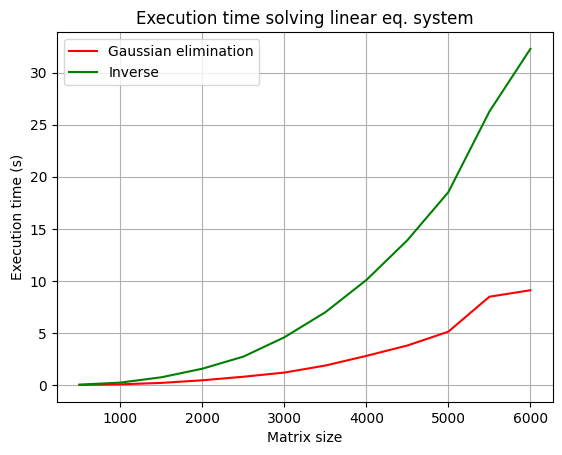

In [40]:
# Compare execution time when solving a linear equation
# system using Gaussian elimination (np.linalg.solve)
# and inverse (np.linalg.inv)

from time import process_time
import matplotlib.pyplot as plt
import numpy as np

N = 6000   # Maximum matrix size (don't choose too big, not larger than 10000)
# Create vector from 500 to N with increment 500
A_size = np.arange(500,N+1,500)

# Preallocate time-vectors
timingGE = np.zeros(len(A_size))
timingI = np.zeros(len(A_size))
for i in range(len(A_size)):
    # Create matrix and rhs (random numbers)
    m = A_size[i]
    A = np.random.rand(m,m)
    b = np.random.rand(m,1)
    # Solve with Gaussian elimination
    t1_start = process_time()
    x = np.linalg.solve(A,b)
    timingGE[i] = process_time()-t1_start
    # Solve with inverse
    t2_start = process_time()
    x = np.linalg.inv(A)@b
    timingI[i] = process_time()-t2_start

# Plot the execution times
plt.plot(A_size, timingGE, color='r', label='Gaussian elimination')
plt.plot(A_size, timingI, color='g', label='Inverse')
plt.xlabel("Matrix size")
plt.ylabel("Execution time (s)")
plt.title("Execution time solving linear eq. system")
plt.legend()
plt.grid()
plt.show()


'''I would personally choose the Inverse method since the plot line continues its trajectory and
does not show a strong variance in data as opposed to the gaussian elimination which tends break
the pattern at matrix size greater than 5000'''
'''Alternatively, i would choose the gaussian elimination as it concludes faster than the inverse method
indicating faster processing speeds when dealing with large datasets'''

<p>
Based on the graph, what is the conclusion? Which of the two algorithms should we preferably choose?
    </p>
<p>
    And that was the end of the lab 1... :-)
    </p>
    <hr>
    